### Overview: All Section
- [ 1 - Import Liabraries and DataSet](#1)
- [ 2 - Data Visualization](#2)
- [ 3 - x, y separation](#3)
- [ 4 - Imbalance Data handling ](#4)
  - [ 4.1 SMOTETomek](#4.1)
  - [ 4.2 Near Miss](#4.2)
  - [ 4.3 Random Over](#4.3)
- [5 Models and Train-Test Split](#5)
- [6 - Without Cross Validation](#6)
  - [ 6.1 Before Sampling](#6.1)
  - [ 6.2 After Sampling: SMOTETomek, Near Miss, Random Over](#6.2)
- [7 - With Cross Validation](#7)
  - [ 7.1 Before Sampling](#7.1)
    - [ 7.1.1 K Fold](#7.1.1)
    - [ 7.1.2 Statified K Fold](#7.1.2)
    - [ 7.1.3 Leave One Out](#7.1.3)
  - [ 7.2 After Sampling](#7.2)
    - [ 7.2.1 K Fold](#7.2.1)
      - [ 7.2.1.1 SMOTETomek](#7.2.1.1)
      - [ 7.2.1.2 Near Miss](#7.2.1.2)
      - [ 7.2.1.3 Random Over](#7.2.1.3)
    - [ 7.2.2 Statified K Fold](#7.2.2)
      - [ 7.2.2.1 SMOTETomek](#7.2.2.1)
      - [ 7.2.2.2 Near Miss](#7.2.2.2)
      - [ 7.2.2.3 Random Over](#7.2.2.3)
    - [ 7.2.3 Leave One Out](#7.2.3)
      - [ 7.2.3.1 SMOTETomek](#7.2.3.1)
      - [ 7.2.3.2 Near Miss](#7.2.3.2)
      - [ 7.2.3.3 Random Over](#7.2.3.3)
    

Section 1

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('new churn data.csv') # import data set 

In [3]:
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [4]:
df.shape 

(5282, 21)

In [5]:
df.drop_duplicates(inplace = True)
df.shape

(5282, 21)

In [6]:
df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [8]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()

# Section 2: Data Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

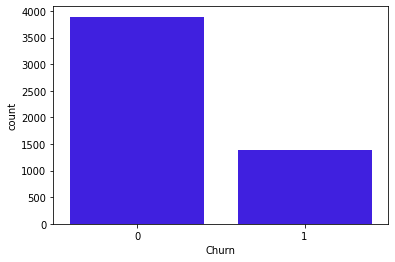

In [10]:
sns.countplot(df['Churn'],color='#2B00FF')

In [11]:
df.corr()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


<AxesSubplot:>

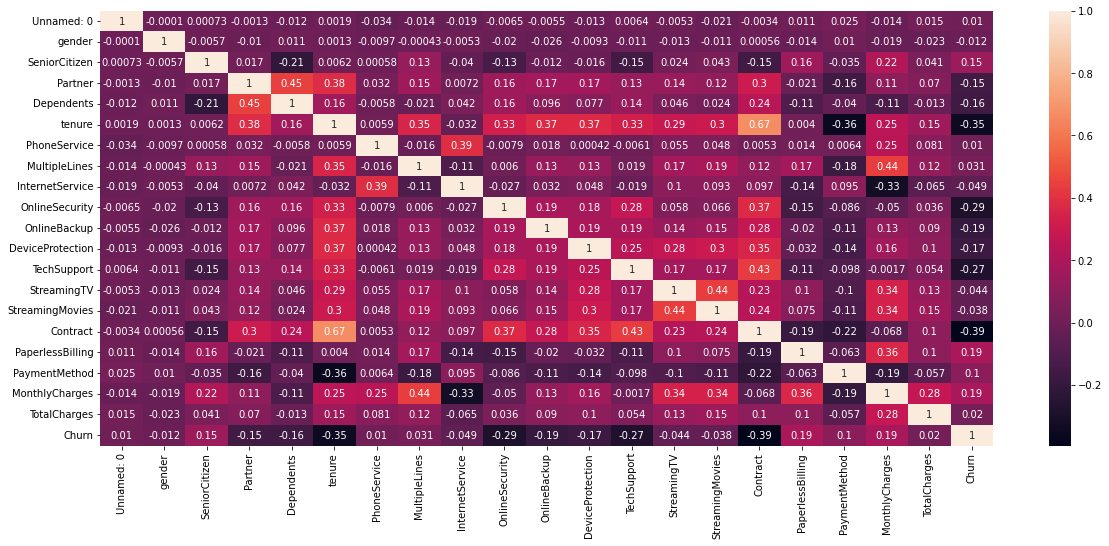

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr() , annot=True)

<AxesSubplot:xlabel='count', ylabel='gender'>

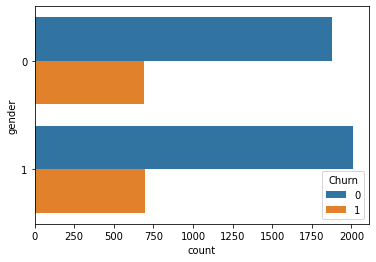

In [13]:
sns.countplot( y = 'gender', hue='Churn', data=df )

<AxesSubplot:xlabel='gender', ylabel='count'>

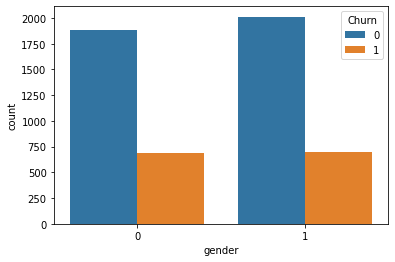

In [14]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

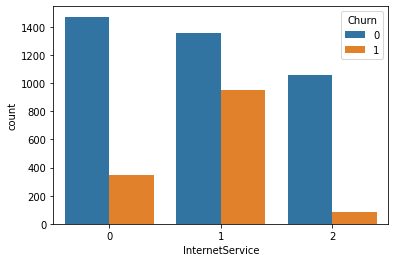

In [15]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

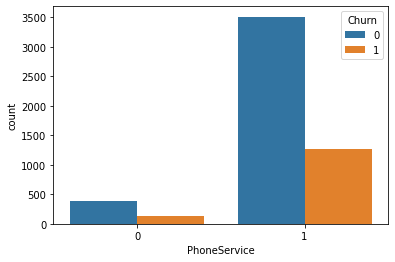

In [16]:
sns.countplot(x = 'PhoneService', hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

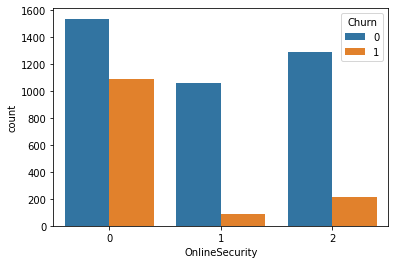

In [17]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [18]:
df['OnlineSecurity'].value_counts() 

0    2625
2    1509
1    1148
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

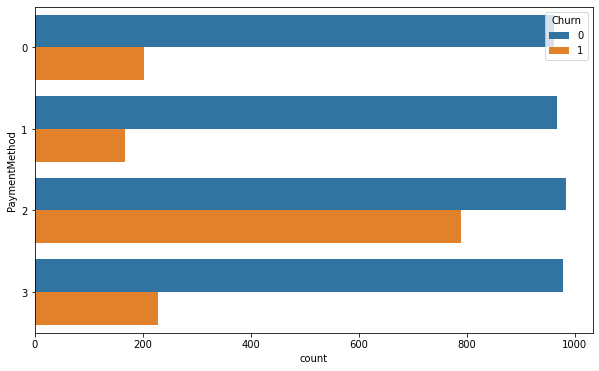

In [19]:
plt.subplots(figsize=(10,6)) 
sns.countplot(y = 'PaymentMethod', hue='Churn', data=df) 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

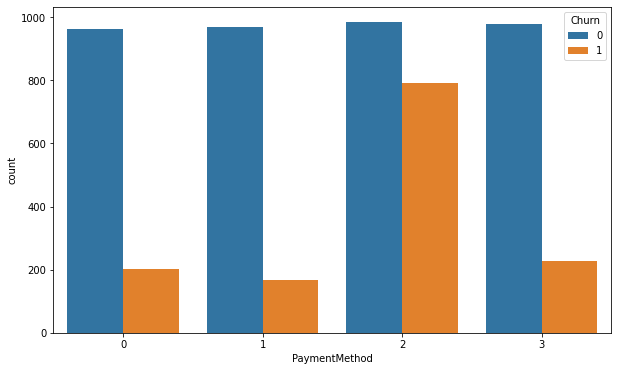

In [20]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod', hue='Churn', data=df) 

# Sectino 3: x, y Separation

In [21]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn'] #  churn is class

In [22]:
x.shape, y.shape

((5282, 20), (5282,))

# Section 4: Imbalance Data Handling

I did all kinds of Sampling Here: `Original Data`, `SMOTETomek`, `NearMiss` and `RandomOverSampler`

In [23]:
y.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

### Section 4.1: Synthetic Minority Oversampling Technique (SMOTETomek)

In [24]:
from imblearn.combine import SMOTETomek

In [25]:
sm = SMOTETomek(random_state = 42)

In [26]:
X_SMOT, Y_SMOT = sm.fit_resample(x, y)

In [27]:
x.shape, y.shape, X_SMOT.shape, Y_SMOT.shape

((5282, 20), (5282,), (7116, 20), (7116,))

In [28]:
y.value_counts(), Y_SMOT.value_counts()

(0    3892
 1    1390
 Name: Churn, dtype: int64,
 1    3558
 0    3558
 Name: Churn, dtype: int64)

### Section 4.2: Near Miss for Under_Sampling

In [29]:
from imblearn.under_sampling import NearMiss

In [30]:
NearMiss_obj = NearMiss()
X_nearMiss , Y_nearMiss = NearMiss_obj.fit_resample(x,y)

In [31]:
x.shape, y.shape, X_nearMiss.shape, Y_nearMiss.shape

((5282, 20), (5282,), (2780, 20), (2780,))

In [32]:
y.value_counts(), Y_nearMiss.value_counts()

(0    3892
 1    1390
 Name: Churn, dtype: int64,
 0    1390
 1    1390
 Name: Churn, dtype: int64)

### Section 4.3: OverSampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
Over_Sampler_onj = RandomOverSampler(random_state = 100)
X_RandomOver , Y_RandomOver = Over_Sampler_onj.fit_resample(x, y)

In [35]:
x.shape, y.shape, X_RandomOver.shape, Y_RandomOver.shape

((5282, 20), (5282,), (7784, 20), (7784,))

In [36]:
y.value_counts(), Y_RandomOver.value_counts()

(0    3892
 1    1390
 Name: Churn, dtype: int64,
 1    3892
 0    3892
 Name: Churn, dtype: int64)

# Section 5: Working on some ML Models
1. Decision Tree
2. XGBoost
3. AdaBosst
4. KNN Classifier
5. LogisticRegression

And Importing Those Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [38]:
AlgoList = ['Decision Tree', 'XGB', 'Adaboost', 'KNN', 'Logistic']

Currently, the Data are => 
1. Orignial (x, y),  
2. SMOTETomek (X_SMOT, Y_SMOT), 
3. NearMiss (X_nearMiss , Y_nearMiss), 
4. RandomOverSampler (X_RandomOver , Y_RandomOver)

In [39]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test                                             = train_test_split(x, y, train_size = .75, random_state = 42) 
X_SMOT_train, X_SMOT_test, Y_SMOT_train, Y_SMOT_test                         = train_test_split(X_SMOT, Y_SMOT, train_size = .75, random_state = 42) 
X_nearMiss_train, X_nearMiss_test, Y_nearMiss_train, Y_nearMiss_test         = train_test_split(X_nearMiss , Y_nearMiss, train_size = .75, random_state = 42) 
X_RandomOver_train, X_RandomOver_test, Y_RandomOver_train, Y_RandomOver_test = train_test_split(X_RandomOver , Y_RandomOver, train_size = .75, random_state = 42) 

# Section 6: Witout Cross Validation (With All Data)

In [40]:
# Score visualization helper function
def GraphMaker(ClassifierList, AccuracyList):
    print("Scores: ",AccuracyList)
    data = {
        'Algorithm Name': ClassifierList,
        'Accuracy': AccuracyList
    }
    accuracy_df = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy'])
    sns.set()
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    sns.barplot(y = "Algorithm Name", x = "Accuracy", data = accuracy_df, palette="Set2")

### Section 6.1: Before Sampling

In [41]:
DecisionTree_BS = DecisionTreeClassifier() 
xgb_BS = XGBClassifier()
adaboost_BS = AdaBoostClassifier()
knn_BS = KNeighborsClassifier(n_neighbors = 10)
Logistic_BS = LogisticRegression()

In [42]:
DecisionTree_BS.fit(x_train, y_train)
xgb_BS.fit(x_train, y_train)
adaboost_BS.fit(x_train, y_train)
knn_BS.fit(x_train, y_train)
Logistic_BS.fit(x_train, y_train)

LogisticRegression()

In [43]:
DecisionTree_BS_score = DecisionTree_BS.score(x_test, y_test)
xgb_BS_score = xgb_BS.score(x_test, y_test)
adaboost_BS_score = adaboost_BS.score(x_test, y_test)
knn_BS_score = knn_BS.score(x_test, y_test)
Logistic_BS_score = Logistic_BS.score(x_test, y_test)

Scores:  [0.7191521574564723, 0.7797123391370174, 0.7880393641180924, 0.7176381529144588, 0.7857683573050719]


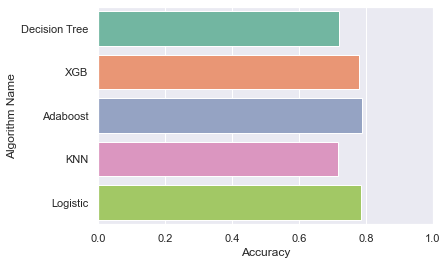

In [44]:
# Without CV & without Sampling
GraphMaker(AlgoList, [DecisionTree_BS_score, xgb_BS_score, adaboost_BS_score, knn_BS_score, Logistic_BS_score])

### Section 6.2: After Sampling

In [45]:
# smot
DecisionTree_AS1 = DecisionTreeClassifier() 
xgb_AS1 = XGBClassifier()
adaboost_AS1 = AdaBoostClassifier()
knn_AS1 = KNeighborsClassifier(n_neighbors = 10)
Logistic_AS1 = LogisticRegression()

# near miss
DecisionTree_AS2 = DecisionTreeClassifier() 
xgb_AS2 = XGBClassifier()
adaboost_AS2 = AdaBoostClassifier()
knn_AS2 = KNeighborsClassifier(n_neighbors = 10)
Logistic_AS2 = LogisticRegression()

# random over
DecisionTree_AS3 = DecisionTreeClassifier() 
xgb_AS3 = XGBClassifier()
adaboost_AS3 = AdaBoostClassifier()
knn_AS3 = KNeighborsClassifier(n_neighbors = 10)
Logistic_AS3 = LogisticRegression()

In [46]:
# SMOT
DecisionTree_AS_score1 = DecisionTree_BS.score(X_SMOT_test, Y_SMOT_test)
xgb_AS_score1 = xgb_BS.score(X_SMOT_test, Y_SMOT_test)
adaboost_AS_score1 = adaboost_BS.score(X_SMOT_test, Y_SMOT_test)
knn_AS_score1 = knn_BS.score(X_SMOT_test, Y_SMOT_test)
Logistic_AS_score1 = Logistic_BS.score(X_SMOT_test, Y_SMOT_test)

# Near miss
DecisionTree_AS_score2 = DecisionTree_BS.score(X_nearMiss_test, Y_nearMiss_test)
xgb_AS_score2 = xgb_BS.score(X_nearMiss_test, Y_nearMiss_test)
adaboost_AS_score2 = adaboost_BS.score(X_nearMiss_test, Y_nearMiss_test)
knn_AS_score2 = knn_BS.score(X_nearMiss_test, Y_nearMiss_test)
Logistic_AS_score2 = Logistic_BS.score(X_nearMiss_test, Y_nearMiss_test)

# Random Over
DecisionTree_AS_score3 = DecisionTree_BS.score(X_RandomOver_test, Y_RandomOver_test)
xgb_AS_score3 = xgb_BS.score(X_RandomOver_test, Y_RandomOver_test)
adaboost_AS_score3 = adaboost_BS.score(X_RandomOver_test, Y_RandomOver_test)
knn_AS_score3 = knn_BS.score(X_RandomOver_test, Y_RandomOver_test)
Logistic_AS_score3 = Logistic_BS.score(X_RandomOver_test, Y_RandomOver_test)

Scores:  [0.8010118043844857, 0.8026981450252951, 0.6812816188870152, 0.537380550871276, 0.7391793142214728]


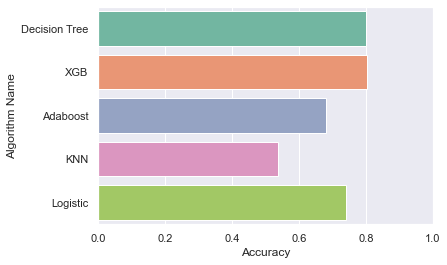

In [47]:
# Without CV & with Sampling: SMOT
GraphMaker(AlgoList, [DecisionTree_AS_score1, xgb_AS_score1, adaboost_AS_score1, knn_AS_score1, Logistic_AS_score1])

Scores:  [0.8848920863309353, 0.883453237410072, 0.7035971223021583, 0.497841726618705, 0.6949640287769784]


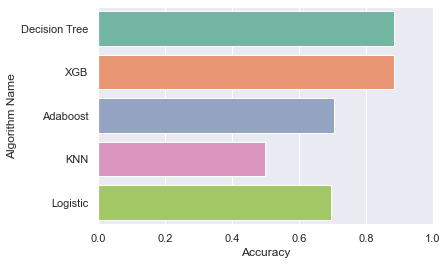

In [48]:
# Without CV & with Sampling: nearMiss
GraphMaker(AlgoList, [DecisionTree_AS_score2, xgb_AS_score2, adaboost_AS_score2, knn_AS_score2, Logistic_AS_score2])

Scores:  [0.8787255909558068, 0.8797533401849948, 0.7060637204522097, 0.5205549845837616, 0.7086330935251799]


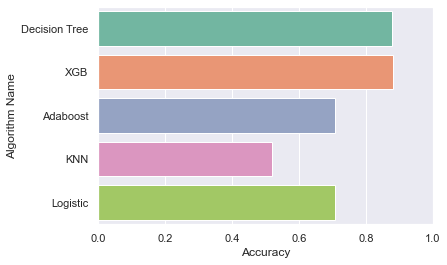

In [49]:
# Without CV & with Sampling: Random Over
GraphMaker(AlgoList, [DecisionTree_AS_score3, xgb_AS_score3, adaboost_AS_score3, knn_AS_score3, Logistic_AS_score3])

# Section 7: With Cross Validation (With All Data)

1. `holdout` (kori nai), 
2. `k-fold`, 
3. `statified k fold`, 
4. `leave one out`

In [50]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

### Section 7.1: Before Sampling

In [51]:
DecisionTree = DecisionTreeClassifier() 
xgb = XGBClassifier()
adaboost = AdaBoostClassifier()
knn = KNeighborsClassifier(n_neighbors = 10)
Logistic = LogisticRegression()

#### Section 7.1.1: k-fold

In [52]:
kfold = KFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, x, y, cv = kfold) 
result2 = cross_val_score(xgb, x, y, cv = kfold) 
result3 = cross_val_score(adaboost, x, y, cv = kfold) 
result4 = cross_val_score(knn, x, y, cv = kfold) 
result5 = cross_val_score(Logistic, x, y, cv = kfold) 

In [53]:
result1, result2, result3, result4, result5

(array([0.70325511, 0.69417108, 0.73560606, 0.73030303]),
 array([0.77744133, 0.75700227, 0.79393939, 0.78257576]),
 array([0.7986374 , 0.77214232, 0.80530303, 0.7969697 ]),
 array([0.7327782 , 0.71461014, 0.73106061, 0.73030303]),
 array([0.80545042, 0.77971234, 0.78484848, 0.80681818]))

In [54]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.7356060606060606,
 0.793939393939394,
 0.8053030303030303,
 0.732778198334595,
 0.8068181818181818)

In [55]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.6941710825132476,
 0.757002271006813,
 0.7721423164269493,
 0.7146101438304315,
 0.7797123391370174)

In [56]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.715833820796917,
 0.7777396887114904,
 0.793263109902966,
 0.7271879946321658,
 0.7942073555387332)

Scores:  [0.715833820796917, 0.7777396887114904, 0.793263109902966, 0.7271879946321658, 0.7942073555387332]


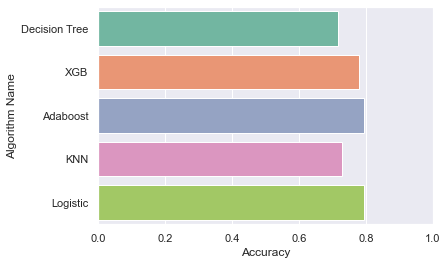

In [57]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

#### Section 7.1.2: Statified K-Fold

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
st_kfold = StratifiedKFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, x, y, cv = st_kfold) 
result2 = cross_val_score(xgb, x, y, cv = st_kfold) 
result3 = cross_val_score(adaboost, x, y, cv = st_kfold) 
result4 = cross_val_score(knn, x, y, cv = st_kfold) 
result5 = cross_val_score(Logistic, x, y, cv = st_kfold) 

In [60]:
result1, result2, result3, result4, result5

(array([0.6994701 , 0.70401211, 0.73636364, 0.73257576]),
 array([0.77895534, 0.76154428, 0.78409091, 0.78030303]),
 array([0.79106737, 0.78425435, 0.80075758, 0.79621212]),
 array([0.72672218, 0.7335352 , 0.72878788, 0.72424242]),
 array([0.8016654 , 0.78803936, 0.78560606, 0.8030303 ]))

In [61]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.7363636363636363,
 0.7840909090909091,
 0.8007575757575758,
 0.7335352006056018,
 0.803030303030303)

In [62]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.6994700984102953,
 0.761544284632854,
 0.7842543527630583,
 0.7242424242424242,
 0.7856060606060606)

In [63]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.7181054010965062,
 0.776223390223201,
 0.7930728557337188,
 0.7283219209506113,
 0.7945852831876676)

Scores:  [0.7181054010965062, 0.776223390223201, 0.7930728557337188, 0.7283219209506113, 0.7945852831876676]


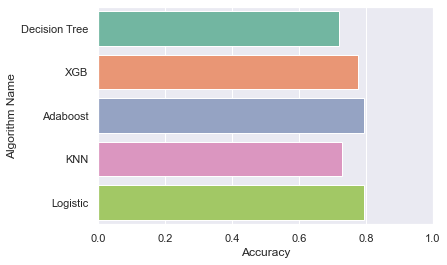

In [64]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

#### Section 7.1.3: Leave One Out Cross Validation

It takes huge time: and I commented these code

In [65]:
from sklearn.model_selection import LeaveOneOut

In [66]:
# le = LeaveOneOut()
# result1 = cross_val_score(DecisionTree, x, y, cv = le) 
# print("Done 1")
# result2 = cross_val_score(xgb, x, y, cv = le) 
# print("Done 2")
# result3 = cross_val_score(adaboost, x, y, cv = le) 
# print("Done 3")
# result4 = cross_val_score(knn, x, y, cv = le) 
# print("Done 4")
# result5 = cross_val_score(Logistic, x, y, cv = le) 
# print("Done 5")

In [67]:
# result1, result2, result3, result4, result5

In [68]:
# result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

In [69]:
# result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

In [70]:
# result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

In [71]:
# GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

### Section 7.2: After Sampling

##### Section 7.2.1: K-fold

###### Section 7.2.1.1: SMOT

In [72]:
kfold = KFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, X_SMOT, Y_SMOT, cv = kfold) 
result2 = cross_val_score(xgb, X_SMOT, Y_SMOT, cv = kfold) 
result3 = cross_val_score(adaboost, X_SMOT, Y_SMOT, cv = kfold) 
result4 = cross_val_score(knn, X_SMOT, Y_SMOT, cv = kfold) 
result5 = cross_val_score(Logistic, X_SMOT, Y_SMOT, cv = kfold) 

In [73]:
result1, result2, result3, result4, result5

(array([0.72793704, 0.72287802, 0.77459247, 0.82686903]),
 array([0.80775717, 0.78077572, 0.85666105, 0.95784148]),
 array([0.76166386, 0.74761102, 0.83024171, 0.86059584]),
 array([0.54918494, 0.56661046, 0.64193367, 0.35132097]),
 array([0.73749297, 0.74423834, 0.81169196, 0.79426644]))

In [74]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.8268690275435638,
 0.9578414839797639,
 0.8605958403597527,
 0.6419336706014614,
 0.8116919617762788)

In [75]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.7228780213603148,
 0.7807757166947723,
 0.7476110174255199,
 0.35132096683530073,
 0.7374929735806633)

In [76]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.7630691399662731,
 0.8507588532883643,
 0.8000281056773468,
 0.5272625070264193,
 0.7719224283305228)

Scores:  [0.7630691399662731, 0.8507588532883643, 0.8000281056773468, 0.5272625070264193, 0.7719224283305228]


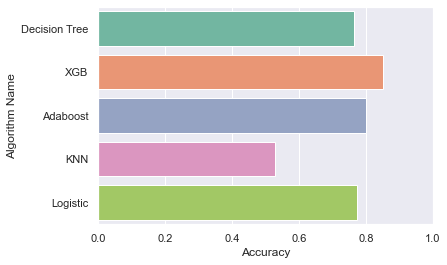

In [77]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

###### Section 7.2.1.2: Near Miss

In [78]:
kfold = KFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, X_nearMiss, Y_nearMiss, cv = kfold) 
result2 = cross_val_score(xgb, X_nearMiss, Y_nearMiss, cv = kfold) 
result3 = cross_val_score(adaboost, X_nearMiss, Y_nearMiss, cv = kfold) 
result4 = cross_val_score(knn, X_nearMiss, Y_nearMiss, cv = kfold) 
result5 = cross_val_score(Logistic, X_nearMiss, Y_nearMiss, cv = kfold) 

In [79]:
result1, result2, result3, result4, result5

(array([0.51942446, 0.51798561, 0.51942446, 0.51654676]),
 array([0.48920863, 0.54964029, 0.54676259, 0.5323741 ]),
 array([0.48633094, 0.57266187, 0.59136691, 0.57266187]),
 array([0.20143885, 0.20143885, 0.03309353, 0.03309353]),
 array([0.48201439, 0.54964029, 0.61438849, 0.58561151]))

In [80]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.5194244604316547,
 0.5496402877697841,
 0.5913669064748202,
 0.2014388489208633,
 0.6143884892086331)

In [81]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.516546762589928,
 0.4892086330935252,
 0.48633093525179855,
 0.033093525179856115,
 0.48201438848920863)

In [82]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.5183453237410072,
 0.5294964028776978,
 0.5557553956834532,
 0.11726618705035971,
 0.5579136690647482)

Scores:  [0.5183453237410072, 0.5294964028776978, 0.5557553956834532, 0.11726618705035971, 0.5579136690647482]


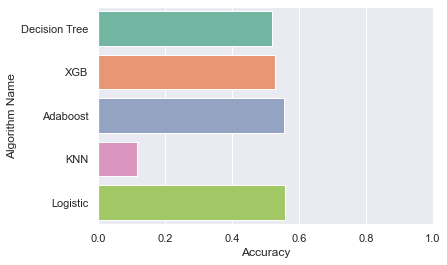

In [83]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

###### Section 7.2.1.3: Random Over

In [93]:
kfold = KFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, X_RandomOver, Y_RandomOver, cv = kfold) 
result2 = cross_val_score(xgb, X_RandomOver, Y_RandomOver, cv = kfold) 
result3 = cross_val_score(adaboost, X_RandomOver, Y_RandomOver, cv = kfold) 
result4 = cross_val_score(knn, X_RandomOver, Y_RandomOver, cv = kfold) 
result5 = cross_val_score(Logistic, X_RandomOver, Y_RandomOver, cv = kfold) 

In [94]:
result1, result2, result3, result4, result5

(array([0.8016444 , 0.81654676, 0.85097636, 1.        ]),
 array([0.81757451, 0.80729702, 0.86690647, 0.9331963 ]),
 array([0.71120247, 0.71274409, 0.76258993, 0.63463515]),
 array([0.51695786, 0.54984584, 0.57913669, 0.23381295]),
 array([0.70554985, 0.70966084, 0.76464543, 0.64491264]))

In [95]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(1.0,
 0.9331963001027749,
 0.762589928057554,
 0.579136690647482,
 0.7646454265159301)

In [96]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.8016443987667009,
 0.8072970195272353,
 0.6346351490236383,
 0.23381294964028776,
 0.6449126413155191)

In [97]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.8672918807810894,
 0.8562435765673175,
 0.7052929085303186,
 0.4699383350462487,
 0.7061921891058581)

Scores:  [0.8672918807810894, 0.8562435765673175, 0.7052929085303186, 0.4699383350462487, 0.7061921891058581]


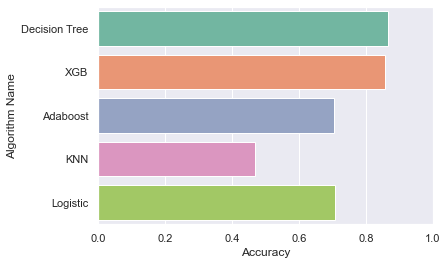

In [98]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

##### Section 7.2.2: Statified K-Fold

###### Section 7.2.2.1: SMOT

In [99]:
st_kfold = StratifiedKFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, X_SMOT, Y_SMOT, cv = st_kfold) 
result2 = cross_val_score(xgb, X_SMOT, Y_SMOT, cv = st_kfold) 
result3 = cross_val_score(adaboost, X_SMOT, Y_SMOT, cv = st_kfold) 
result4 = cross_val_score(knn, X_SMOT, Y_SMOT, cv = st_kfold) 
result5 = cross_val_score(Logistic, X_SMOT, Y_SMOT, cv = st_kfold) 

In [100]:
result1, result2, result3, result4, result5

(array([0.66498033, 0.78864531, 0.84148398, 0.85328836]),
 array([0.67903316, 0.84373243, 0.89544688, 0.91174817]),
 array([0.7054525 , 0.8381113 , 0.86677909, 0.87015177]),
 array([0.63406408, 0.63237774, 0.67678471, 0.65767285]),
 array([0.72681282, 0.81225408, 0.83305228, 0.84766723]))

In [101]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.8532883642495784,
 0.9117481731309725,
 0.8701517706576728,
 0.6767847105115233,
 0.8476672287802136)

In [102]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.6649803260258572,
 0.6790331646992692,
 0.7054525014052838,
 0.6323777403035413,
 0.7268128161888702)

In [103]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.7870994940978078,
 0.8324901630129286,
 0.820123664980326,
 0.6502248454187746,
 0.8049465992130411)

Scores:  [0.7870994940978078, 0.8324901630129286, 0.820123664980326, 0.6502248454187746, 0.8049465992130411]


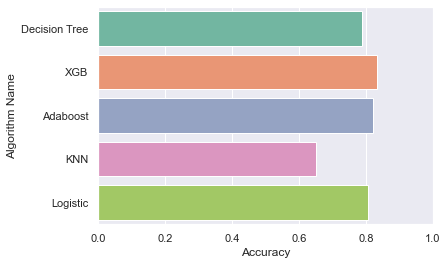

In [104]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

###### Section 7.2.2.2: nearMiss

In [105]:
st_kfold = StratifiedKFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, X_SMOT, Y_SMOT, cv = st_kfold) 
result2 = cross_val_score(xgb, X_SMOT, Y_SMOT, cv = st_kfold) 
result3 = cross_val_score(adaboost, X_SMOT, Y_SMOT, cv = st_kfold) 
result4 = cross_val_score(knn, X_SMOT, Y_SMOT, cv = st_kfold) 
result5 = cross_val_score(Logistic, X_SMOT, Y_SMOT, cv = st_kfold) 

In [106]:
result1, result2, result3, result4, result5

(array([0.66554244, 0.77852726, 0.84204609, 0.84991568]),
 array([0.67903316, 0.84373243, 0.89544688, 0.91174817]),
 array([0.7054525 , 0.8381113 , 0.86677909, 0.87015177]),
 array([0.63406408, 0.63237774, 0.67678471, 0.65767285]),
 array([0.72681282, 0.81225408, 0.83305228, 0.84766723]))

In [107]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.8499156829679595,
 0.9117481731309725,
 0.8701517706576728,
 0.6767847105115233,
 0.8476672287802136)

In [108]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.6655424395727937,
 0.6790331646992692,
 0.7054525014052838,
 0.6323777403035413,
 0.7268128161888702)

In [109]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.7840078695896571,
 0.8324901630129286,
 0.820123664980326,
 0.6502248454187746,
 0.8049465992130411)

Scores:  [0.7840078695896571, 0.8324901630129286, 0.820123664980326, 0.6502248454187746, 0.8049465992130411]


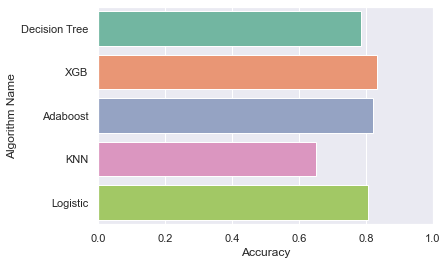

In [110]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

###### Section 7.2.2.3: Random Over

In [111]:
st_kfold = StratifiedKFold(n_splits = 4)
result1 = cross_val_score(DecisionTree, X_SMOT, Y_SMOT, cv = st_kfold) 
result2 = cross_val_score(xgb, X_SMOT, Y_SMOT, cv = st_kfold) 
result3 = cross_val_score(adaboost, X_SMOT, Y_SMOT, cv = st_kfold) 
result4 = cross_val_score(knn, X_SMOT, Y_SMOT, cv = st_kfold) 
result5 = cross_val_score(Logistic, X_SMOT, Y_SMOT, cv = st_kfold) 

In [112]:
result1, result2, result3, result4, result5

(array([0.67341203, 0.79370433, 0.84204609, 0.84710512]),
 array([0.67903316, 0.84373243, 0.89544688, 0.91174817]),
 array([0.7054525 , 0.8381113 , 0.86677909, 0.87015177]),
 array([0.63406408, 0.63237774, 0.67678471, 0.65767285]),
 array([0.72681282, 0.81225408, 0.83305228, 0.84766723]))

In [113]:
result1.max(), result2.max(), result3.max(), result4.max(), result5.max()

(0.8471051152332771,
 0.9117481731309725,
 0.8701517706576728,
 0.6767847105115233,
 0.8476672287802136)

In [114]:
result1.min(), result2.min(), result3.min(), result4.min(), result5.min()

(0.6734120292299044,
 0.6790331646992692,
 0.7054525014052838,
 0.6323777403035413,
 0.7268128161888702)

In [115]:
result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()

(0.7890668915120854,
 0.8324901630129286,
 0.820123664980326,
 0.6502248454187746,
 0.8049465992130411)

Scores:  [0.7890668915120854, 0.8324901630129286, 0.820123664980326, 0.6502248454187746, 0.8049465992130411]


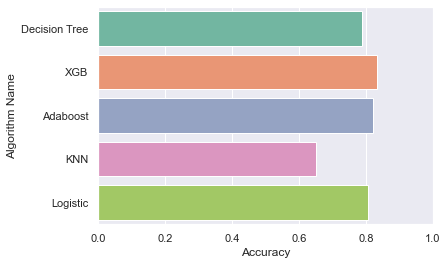

In [116]:
GraphMaker(AlgoList, [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean()])

##### Section 7.2.3: Leave One Out